<table align="left">
  <td>
    <a href="https://colab.research.google.com/drive/1rSxaLafk_2bIWjTpEW5u2V8VeCbpjRTn?usp=sharing" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>
  </td>
</table>

Attribution : Most of the code taken from https://www.kaggle.com/nirajvermafcb/support-vector-machine-detail-analysis/notebook

Practise exercise to run **Support Vector machine** with different **kernels(linear,gaussian,polynomial)**. Also, tune the various parameters such as **C** ,**gamma** and **degree** to find out the best performing model .

# Importing all the necessary libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn import datasets

import matplotlib.pyplot as plt

%matplotlib inline

Download dataset from iris dataset and creating a dataframe

In [57]:
from sklearn.datasets import load_iris
iris = load_iris()
df = pd.DataFrame(iris.data,columns=iris.feature_names)
print(df.columns)

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)'],
      dtype='object')


# Adding the Target and the Label to the dataset and printing the values of labels

In [80]:
df['Target'] = iris.target
df['Label'] = df.Target.replace(dict(enumerate(iris.target_names)))
Label_list = df['Label'].to_list()
print(Label_list)

['setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'versicolor', 'versicolor', 'versicolor', 'versicolor', 'versicolor', 'versicolor', 'versicolor', 'versicolor', 'versicolor', 'versicolor', 'versicolor', 'versicolor', 'versicolor', 'versicolor', 'versicolor', 'versicolor', 'versicolor', 'versicolor', 'versicolor', 'versicolor', 'versicolor', 'versicolor', 'versicolor', 'versicolor', 'versicolor', 'versicolor', 'versicolor', 'versicolor', 'versicolor', 'versicolor', 'versicolor', 'versicolor', 'versicolor', 'versicolor', 'versicolor', 'versicol

In [50]:
print(df.info(verbose=True))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   Target             150 non-null    int64  
 5   Label              150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB
None


In [81]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Target,Label
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


# Checking the correlation between each feature

In [35]:
df.corr()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Target
sepal length (cm),1.000000,-0.117570,0.871754,0.817941,0.782561
sepal width (cm),-0.117570,1.000000,-0.428440,-0.366126,-0.426658
petal length (cm),0.871754,-0.428440,1.000000,0.962865,0.949035
petal width (cm),0.817941,-0.366126,0.962865,1.000000,0.956547
Target,0.782561,-0.426658,0.949035,0.956547,1.000000


# Checking for null values 

In [36]:
df.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
Target               0
Label                0
dtype: int64

In [84]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


Checking the count of Labels - Setosa, virginica and versicolor

In [63]:
print("Total number of labels: {}".format(df.shape[0]))
print("Number of setosa: {}".format(df[df.Label == 'setosa'].shape[0]))
print("Number of versicolor: {}".format(df[df.Label == 'versicolor'].shape[0]))
print("Number of virginica: {}".format(df[df.Label == 'virginica'].shape[0]))

Total number of labels: 150
Number of setosa: 50
Number of versicolor: 50
Number of virginica: 50


In [88]:
df=df.drop_duplicates()

In [101]:
print("Total number of labels: {}".format(df.shape[0]))
print("Number of setosa: {}".format(df[df.Label == 'setosa'].shape[0]))
print("Number of versicolor: {}".format(df[df.Label == 'versicolor'].shape[0]))
print("Number of virginica: {}".format(df[df.Label == 'virginica'].shape[0]))

Total number of labels: 149
Number of setosa: 50
Number of versicolor: 50
Number of virginica: 49


In [64]:
df.shape

(150, 6)

All the 3 labels are equally split.

# Data Analysis using a PairPlot.
Here, different graphs are plotted based on the Labels which we have used.

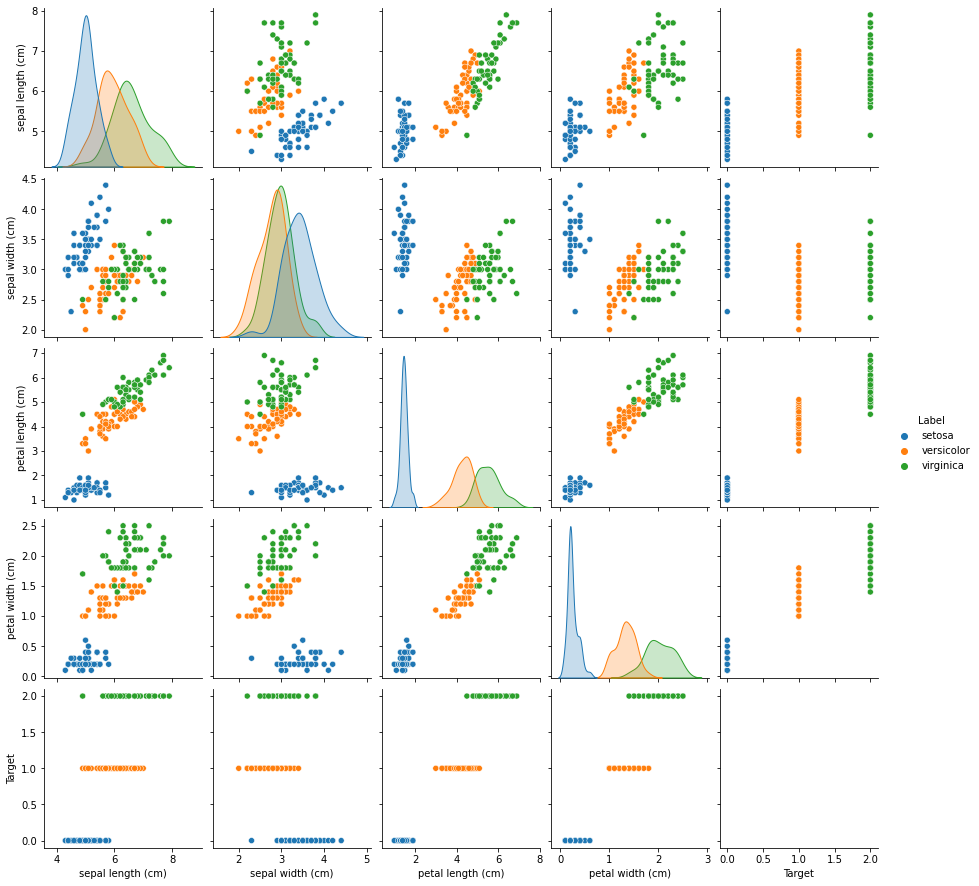

In [87]:
sns.pairplot(df, hue = 'Label')

From the plots we can see the following observations.
1. The Sepal length and width are always smaller compared to the other 2 lables.
2. The versicolor's dimensions are in the mid-range when compared to the Setosa and the virginica
3. The virginica has the longest size in both petal and sepal length

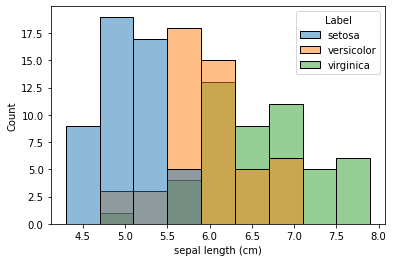

In [91]:
#df.hist(bins=50, figsize=(20,15))
#plt.show()

sns.histplot(data=df, x="sepal length (cm)", hue="Label")

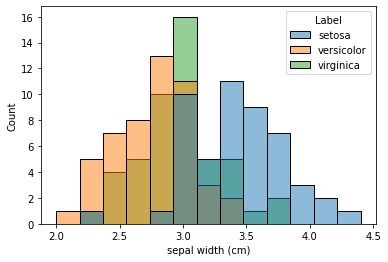

In [93]:
sns.histplot(data=df, x="sepal width (cm)", hue="Label")

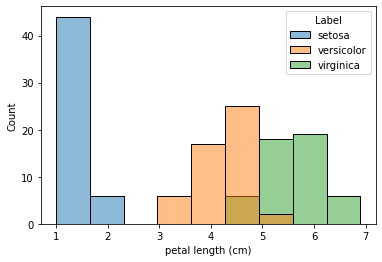

In [92]:
sns.histplot(data=df, x="petal length (cm)", hue="Label")

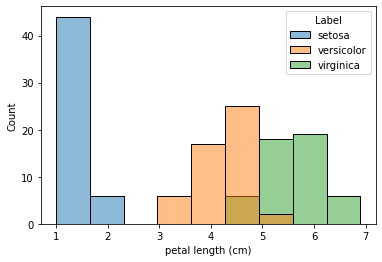

In [94]:
sns.histplot(data=df, x="petal length (cm)", hue="Label")

# Separating features and labels

In [149]:
X=df[['petal length (cm)','petal width (cm)','sepal length (cm)','sepal width (cm)']]
X.shape[0]

149

# Converting string value to int type for labels

In [150]:
from sklearn.preprocessing import LabelEncoder
y=df.iloc[:,-1]

# Encode label category
# Setosa -> 0
# Versicolor ->1
# Virginica -> 2

label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)
y.size

149

# Data Standardisation
Standardization refers to shifting the distribution of each attribute to have a mean of zero and a standard deviation of one (unit variance). It is useful to standardize attributes for a model. 

In [ ]:
# Scale the data to be between -1 and 1
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
print(X_scaled)

# Splitting dataset into training set and testing set for better generalisation

In [153]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# Training with SVM

Running SVM with default hyperparameter.

In [155]:
from sklearn.svm import SVC
from sklearn import metrics
svc=SVC() #Default hyperparameters
svc.fit(X_train,y_train)
y_pred=svc.predict(X_test)
print('Accuracy Score:')
print(metrics.accuracy_score(y_test,y_pred))

Accuracy Score:
0.9666666666666667


# Default Linear kernel

In [156]:
svc=SVC(kernel='linear')
svc.fit(X_train,y_train)
y_pred=svc.predict(X_test)
print('Accuracy Score:')
print(metrics.accuracy_score(y_test,y_pred))

Accuracy Score:
1.0


# RBF kernel

In [157]:
svc=SVC(kernel='rbf')
svc.fit(X_train,y_train)
y_pred=svc.predict(X_test)
print('Accuracy Score:')
print(metrics.accuracy_score(y_test,y_pred))

Accuracy Score:
0.9666666666666667


We can conclude from above that svm by default uses **rbf** kernel as a parameter for kernel

# Root Mean Square Error

In [167]:
from sklearn import metrics
metrics.mean_squared_error(y_test, y_pred, sample_weight=None, multioutput='uniform_average', squared=True)

0.03333333333333333

# Cross Validation on Linear kernel

In [168]:
from sklearn.model_selection import cross_val_score
svc_linear=SVC(kernel='linear')
scores = cross_val_score(svc_linear, X, y, cv=10, scoring='accuracy') #cv is cross validation
print(scores)

[1.         0.93333333 1.         1.         0.86666667 1.
 0.93333333 1.         1.         1.        ]


We can see above how the accuracy score is different everytime.This shows that accuracy score depends upon how the datasets got split.

In [170]:
print(scores.mean())

0.9733333333333334


In K-fold cross validation we generally take the mean of all the scores.

# CV on rbf kernel

In [192]:
C_range=list(np.arange(0.1,6,0.1))
acc_score=[]
for c in C_range:
    svc_rbf = SVC(kernel='rbf', C=c)
    scores = cross_val_score(svc, X, y, cv=10, scoring='accuracy')
    acc_score.append(scores.mean())
print(acc_score)

[0.9666666666666668, 0.9666666666666668, 0.9666666666666668, 0.9666666666666668, 0.9666666666666668, 0.9666666666666668, 0.9666666666666668, 0.9666666666666668, 0.9666666666666668, 0.9666666666666668, 0.9666666666666668, 0.9666666666666668, 0.9666666666666668, 0.9666666666666668, 0.9666666666666668, 0.9666666666666668, 0.9666666666666668, 0.9666666666666668, 0.9666666666666668, 0.9666666666666668, 0.9666666666666668, 0.9666666666666668, 0.9666666666666668, 0.9666666666666668, 0.9666666666666668, 0.9666666666666668, 0.9666666666666668, 0.9666666666666668, 0.9666666666666668, 0.9666666666666668, 0.9666666666666668, 0.9666666666666668, 0.9666666666666668, 0.9666666666666668, 0.9666666666666668, 0.9666666666666668, 0.9666666666666668, 0.9666666666666668, 0.9666666666666668, 0.9666666666666668, 0.9666666666666668, 0.9666666666666668, 0.9666666666666668, 0.9666666666666668, 0.9666666666666668, 0.9666666666666668, 0.9666666666666668, 0.9666666666666668, 0.9666666666666668, 0.9666666666666668,

In [193]:
print(scores.mean())

0.9666666666666668


Text(0, 0.5, 'Cross-Validated Accuracy')

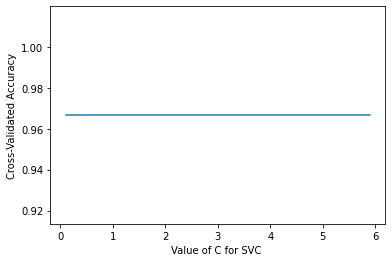

In [194]:
import matplotlib.pyplot as plt
%matplotlib inline

C_values=list(np.arange(0.1,6,0.1))
plt.plot(C_values,acc_score)
plt.xlabel('Value of C for SVC ')
plt.ylabel('Cross-Validated Accuracy')

# Tune SVM hyperparameters by using GridSearchCV with cross validation.

In [ ]:
from sklearn.model_selection import GridSearchCV
param_grid = {'C' : [0.1, 1, 10, 100, 1000], 'gamma' : [1, 0.1, 0.01, 0.001, 0.0001]}
grid_svm = GridSearchCV(svc_rbf, param_grid, cv = 7, verbose=5) 
grid_svm.fit(X_train, y_train)

In [182]:
grid_svm_pred = grid_svm.predict(X_test)

In [186]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, grid_svm_pred)

array([[10,  0,  0],
       [ 0, 12,  1],
       [ 0,  0,  7]])

In [187]:
from sklearn.metrics import precision_recall_fscore_support
precision_recall_fscore_support(y_test, grid_svm_pred)

(array([1.   , 1.   , 0.875]),
 array([1.        , 0.92307692, 1.        ]),
 array([1.        , 0.96      , 0.93333333]),
 array([10, 13,  7]))

In [188]:
from sklearn import metrics
metrics.mean_squared_error(y_test, grid_svm_pred, sample_weight=None, multioutput='uniform_average', squared=True)

0.03333333333333333

In [190]:
print(grid_svm.best_params_)

{'C': 100, 'gamma': 0.001}


In [191]:
print(metrics.accuracy_score(y_test,grid_svm_pred))

0.9666666666666667


Accuracy score is highest for C=100 and gamma = 0.001

In [198]:
gamma_range=[0.0001,0.001,0.01,0.1,1,10,100]
acc_score=[]
for g in gamma_range:
    svc = SVC(kernel='rbf', gamma=g)
    scores = cross_val_score(svc, X, y, cv=10, scoring='accuracy')
    acc_score.append(scores.mean())
print(acc_score)    
    

[0.6928571428571428, 0.6928571428571428, 0.9333333333333333, 0.9666666666666668, 0.9733333333333334, 0.9333333333333333, 0.6128571428571429]


Text(0, 0.5, 'Cross-Validated Accuracy')

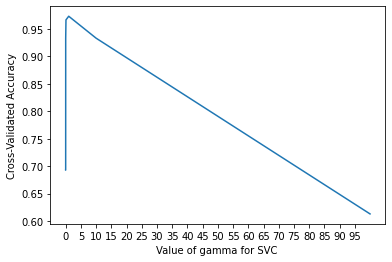

In [199]:
import matplotlib.pyplot as plt
%matplotlib inline

gamma_range=[0.0001,0.001,0.01,0.1,1,10,100]

# plot the value of C for SVM (x-axis) versus the cross-validated accuracy (y-axis)
plt.plot(gamma_range,acc_score)
plt.xlabel('Value of gamma for SVC ')
plt.xticks(np.arange(0.0001,100,5))
plt.ylabel('Cross-Validated Accuracy')

In [200]:
gamma_range=[0.0001,0.001,0.01,0.1]
acc_score=[]
for g in gamma_range:
    svc = SVC(kernel='rbf', gamma=g)
    scores = cross_val_score(svc, X, y, cv=10, scoring='accuracy')
    acc_score.append(scores.mean())
print(acc_score)    
    

[0.6928571428571428, 0.6928571428571428, 0.9333333333333333, 0.9666666666666668]


Text(0, 0.5, 'Cross-Validated Accuracy')

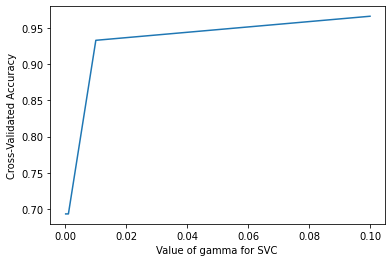

In [202]:
import matplotlib.pyplot as plt
%matplotlib inline

gamma_range=[0.0001,0.001,0.01,0.1]

# plot the value of C for SVM (x-axis) versus the cross-validated accuracy (y-axis)
plt.plot(gamma_range,acc_score)
plt.xlabel('Value of gamma for SVC ')
plt.ylabel('Cross-Validated Accuracy')

The score increases steadily and raches its peak at 0.01 and then decreases till gamma=1.Thus Gamma should be around 0.01.

Let us look into more detail for gamma values

In [203]:
gamma_range=[0.01,0.02,0.03,0.04,0.05]
acc_score=[]
for g in gamma_range:
    svc = SVC(kernel='rbf', gamma=g)
    scores = cross_val_score(svc, X, y, cv=10, scoring='accuracy')
    acc_score.append(scores.mean())
print(acc_score)    
    

[0.9333333333333333, 0.9466666666666667, 0.9533333333333334, 0.96, 0.9733333333333334]


Text(0, 0.5, 'Cross-Validated Accuracy')

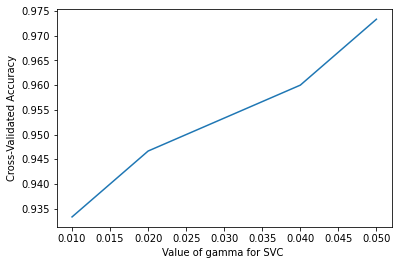

In [204]:
import matplotlib.pyplot as plt
%matplotlib inline

gamma_range=[0.01,0.02,0.03,0.04,0.05]

# plot the value of C for SVM (x-axis) versus the cross-validated accuracy (y-axis)
plt.plot(gamma_range,acc_score)
plt.xlabel('Value of gamma for SVC ')
plt.ylabel('Cross-Validated Accuracy')

In [206]:
degree=[2,3,4,5,6]
acc_score=[]
for d in degree:
    svc = SVC(kernel='poly', degree=d)
    scores = cross_val_score(svc, X, y, cv=10, scoring='accuracy')
    acc_score.append(scores.mean())
print(acc_score)    
    

[0.9733333333333334, 0.9666666666666668, 0.9800000000000001, 0.9733333333333334, 0.96]


Text(0, 0.5, 'Cross-Validated Accuracy')

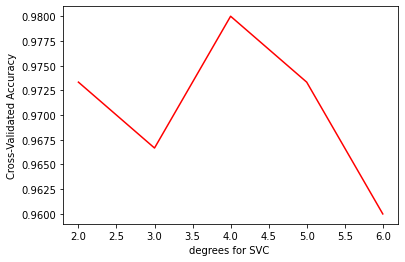

In [207]:
import matplotlib.pyplot as plt
%matplotlib inline

degree=[2,3,4,5,6]

# plot the value of C for SVM (x-axis) versus the cross-validated accuracy (y-axis)
plt.plot(degree,acc_score,color='r')
plt.xlabel('degrees for SVC ')
plt.ylabel('Cross-Validated Accuracy')

In [212]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 9)
knn.fit(X_train,y_train)
print("Training Accuracy {:.2f}".format(knn.score(X_train,y_train)))
print("Testing Accuracy {:.2f}".format(knn.score(X_test,y_test)))

Training Accuracy 0.98
Testing Accuracy 0.97


In [213]:
knn_y_pred = knn.predict(X_test)
print(metrics.accuracy_score(y_test, knn_y_pred))

0.9666666666666667


In [217]:
from sklearn.model_selection import RandomizedSearchCV
random_search = RandomizedSearchCV(knn,dict(n_neighbors = list(range(10,20))),cv = 10,scoring = "accuracy",random_state=42)
random_search.fit(X_train,y_train)

RandomizedSearchCV(cv=10, error_score=nan,
                   estimator=KNeighborsClassifier(algorithm='auto',
                                                  leaf_size=30,
                                                  metric='minkowski',
                                                  metric_params=None,
                                                  n_jobs=None, n_neighbors=9,
                                                  p=2, weights='uniform'),
                   iid='deprecated', n_iter=10, n_jobs=None,
                   param_distributions={'n_neighbors': [10, 11, 12, 13, 14, 15,
                                                        16, 17, 18, 19]},
                   pre_dispatch='2*n_jobs', random_state=42, refit=True,
                   return_train_score=False, scoring='accuracy', verbose=0)

In [218]:
print(random_search.best_score_)

0.975


In [219]:
print(random_search.best_params_)

{'n_neighbors': 10}
